In [1]:
import pandas as pd

# Load the first CSV
df_sae = pd.read_csv('sae_cheesecake_eval.csv')

# Load the second CSV
df_pa = pd.read_csv('./cheesecake_llama_population_averaging_eval.csv')


In [2]:
df_sae['Layer'] = df_sae['Layer'] + 1

In [3]:
df_sae

,Model,Word,step,TP,FP,n_training,Layer,Training,Test
0,sae,cheese,0,0.285714,0.000000,14,1,True,False
1,sae,cheese,0,1.000000,0.000000,14,2,True,False
2,sae,cheese,0,1.000000,0.009804,14,3,True,False
3,sae,cheese,0,1.000000,0.000000,14,4,True,False
4,sae,cheese,0,0.857143,0.004902,14,5,True,False
...,...,...,...,...,...,...,...,...,...
181,sae,cheesecake,0,0.000000,0.000000,22,27,False,True
182,sae,cheesecake,0,0.000000,0.007246,22,28,False,True
183,sae,cheesecake,0,0.000000,0.000000,22,29,False,True
184,sae,cheesecake,0,0.000000,0.000000,22,30,False,True


In [4]:
df_pa

,Model,Word,step,TP,FP,n_training,Layer,Training,Test
0,llama3,cheesecake,0,0.916667,0.0000,5,0,True,False
1,llama3,cheesecake,0,0.208333,0.0000,5,1,True,False
2,llama3,cheesecake,0,0.000000,0.0000,5,2,True,False
3,llama3,cheesecake,0,0.000000,0.0000,5,3,True,False
4,llama3,cheesecake,0,0.000000,0.0000,5,4,True,False
...,...,...,...,...,...,...,...,...,...
193,llama3,cake,0,0.685714,0.0000,5,28,False,True
194,llama3,cake,0,0.685714,0.0000,5,29,False,True
195,llama3,cake,0,0.657143,0.0000,5,30,False,True
196,llama3,cake,0,0.685714,0.0075,5,31,False,True


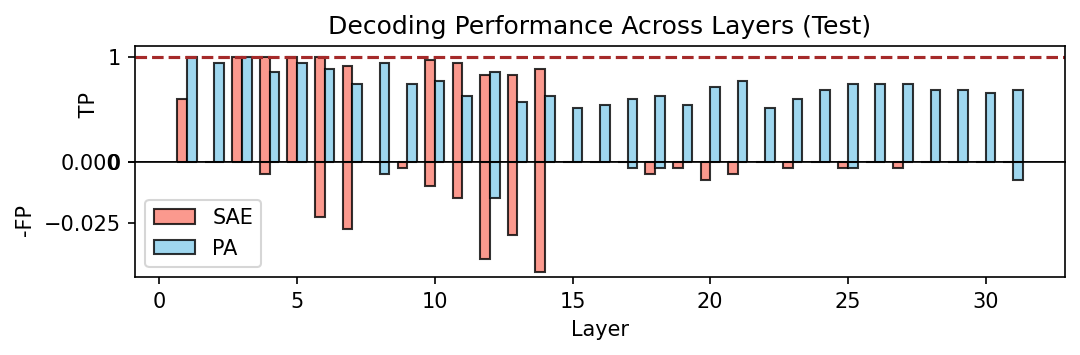

In [6]:
import numpy as np
import matplotlib.pyplot as plt
WORD = 'cake'
fig, ax = plt.subplots(2, 1, figsize=(8, 2), sharex=True, gridspec_kw={'height_ratios': [1, 1]}, dpi = 150)

sae = df_sae[(df_sae['Word'] == WORD) & (df_sae['Test'] == True)]
pa = df_pa[(df_pa['Word'] == WORD) & (df_pa['Test'] == True)]

layers = sorted(set(df_sae['Layer']).intersection(df_pa['Layer']))

# Filter both DataFrames to only include common layers
sae_common = sae[sae['Layer'].isin(layers)]
pa_common = pa[pa['Layer'].isin(layers)]

x = np.arange(len(layers))+1  # the label locations
width = 0.35  # width of bars

# TP bars
ax[0].bar(x - width/2, sae_common['TP'], width, label='SAE', color = 'salmon', alpha=0.8,edgecolor="black")
ax[0].bar(x + width/2, pa_common['TP'], width, label='PA', color = 'skyblue', alpha=0.8, edgecolor="black")
ax[0].set_ylabel(' TP ')
ax[0].set_title('Decoding Performance Across Layers (Test)')
ax[0].set_ylim([0,1.1])
ax[0].tick_params(axis='x')  # Rotate x-axis labels for better readability
ax[0].axhline(y=1, color='brown', linestyle='--',)
# Lower bar plot (reverse)

ax[1].bar(x - width/2, -sae_common['FP'], width, label='SAE',color = 'salmon',  alpha=0.8,edgecolor="black")
ax[1].bar(x + width/2, -pa_common['FP'], width, label='PA',color = 'skyblue',  alpha=0.8,edgecolor="black")
ax[1].set_ylabel( '-FP')
ax[1].legend()
ax[1].tick_params(axis='x')  # Rotate x-axis labels for better readability
ax[1].set_xlabel('Layer')

plt.subplots_adjust(hspace=0)
# minimal false positive given the maximal true positive 
plt.show()

# # Save the figure
# file_path = f"./plots/SAE_PA_comparison{WORD}.png"
# fig.savefig(file_path, bbox_inches='tight')
